<a href="https://colab.research.google.com/github/SandyaMD/-Healthcare-Analytics-for-Doctor-Visits/blob/main/Doctor_visit_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/1719219834-DoctorVisits - DA (1).csv')
print(df.head(15))


    Unnamed: 0  visits  gender   age  income  illness  reduced  health  \
0            1       1  female  0.19    0.55        1        4       1   
1            2       1  female  0.19    0.45        1        2       1   
2            3       1    male  0.19    0.90        3        0       0   
3            4       1    male  0.19    0.15        1        0       0   
4            5       1    male  0.19    0.45        2        5       1   
5            6       1  female  0.19    0.35        5        1       9   
6            7       1  female  0.19    0.55        4        0       2   
7            8       1  female  0.19    0.15        3        0       6   
8            9       1  female  0.19    0.65        2        0       5   
9           10       1    male  0.19    0.15        1        0       0   
10          11       1    male  0.19    0.45        1        0       0   
11          12       1    male  0.19    0.25        2        0       2   
12          13       2    male  0.19  

COMPLETE INFORMATION ABOUT THE DATASET SUCH AS COLUMN NAME, COUNT, DATATYPE AND OVERALL MEMORY USAGE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190 entries, 0 to 5189
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5190 non-null   int64  
 1   visits      5190 non-null   int64  
 2   gender      5190 non-null   object 
 3   age         5190 non-null   float64
 4   income      5190 non-null   float64
 5   illness     5190 non-null   int64  
 6   reduced     5190 non-null   int64  
 7   health      5190 non-null   int64  
 8   private     5190 non-null   object 
 9   freepoor    5190 non-null   object 
 10  freerepat   5190 non-null   object 
 11  nchronic    5190 non-null   object 
 12  lchronic    5190 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 527.2+ KB


TOTAL NO. OF PEOPLE BASED ON THEIR COUNT ILLNESS

In [5]:
df['illness'].value_counts()

illness
1    1638
0    1554
2     946
3     542
4     274
5     236
Name: count, dtype: int64

In [6]:
df['gender'].value_counts()

gender
female    2702
male      2488
Name: count, dtype: int64

VISUALIZATION AND ANALYZATION OF MAX, MIN AND MEDIUM INCOME

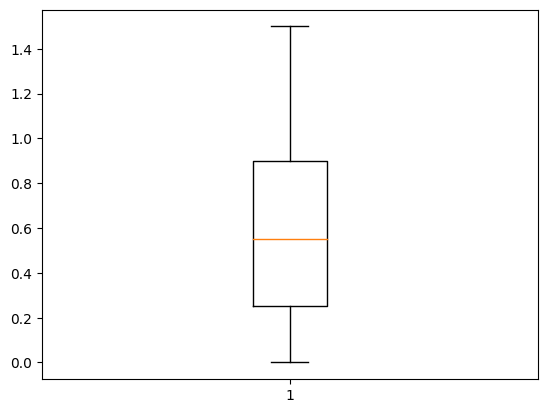

In [8]:
y = list(df['income'])
plt.boxplot(y)
plt.show()

NO. OF DAYS REDUCED ACTIVITY OF MALE AND FEMALE SEPERATELY DUE TO ILLNESS

In [18]:
df.groupby(['gender', 'illness'])['reduced'].mean()

gender  illness
female  0          0.042710
        1          1.083933
        2          1.015066
        3          1.246246
        4          1.928144
        5          2.702532
male    0          0.057143
        1          0.781095
        2          1.067470
        3          1.511962
        4          1.710280
        5          2.782051
Name: reduced, dtype: float64

VISUALIZATION FOR ANY MISSING VALUES IN THE DATASET BASD ON THE HEAT MAP

<Axes: >

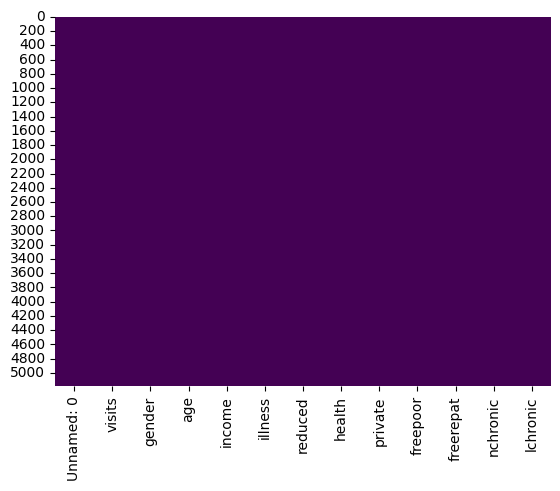

In [19]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

CORRELATION BTWN DIFFERENT VARIABLES IN THE GIVEN DATASET

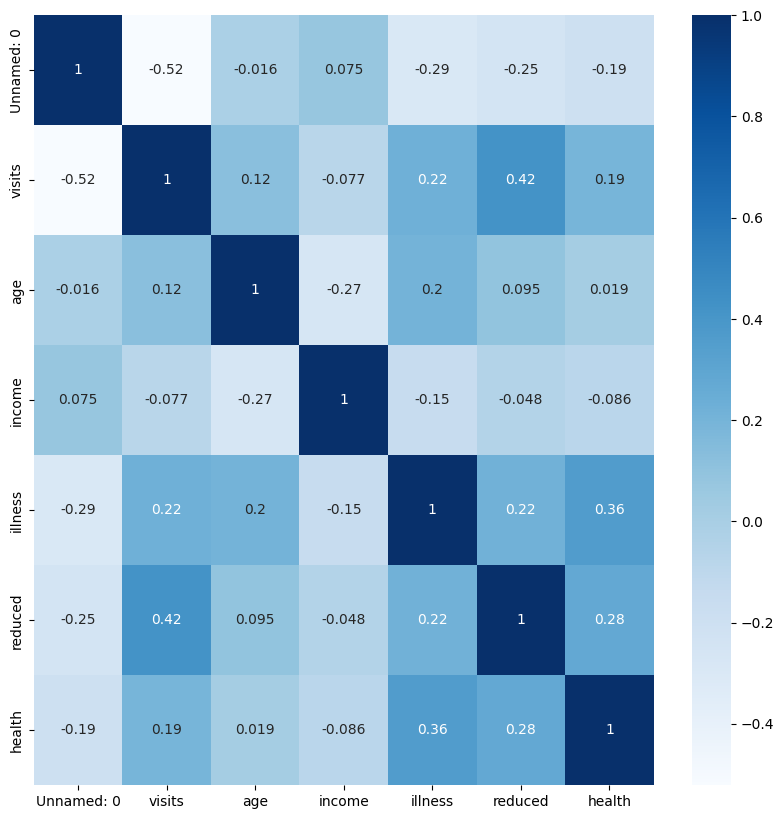

In [24]:
# Select only numerical columns before calculating correlation
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10,10))
sns.heatmap(numerical_df.corr(), cbar=True, annot=True, cmap='Blues')
plt.show()

ANALYZE HOW THE INCOME OF THE PATIENT AFFECT THE NO. OF VISITS TO THE HOSPITAL

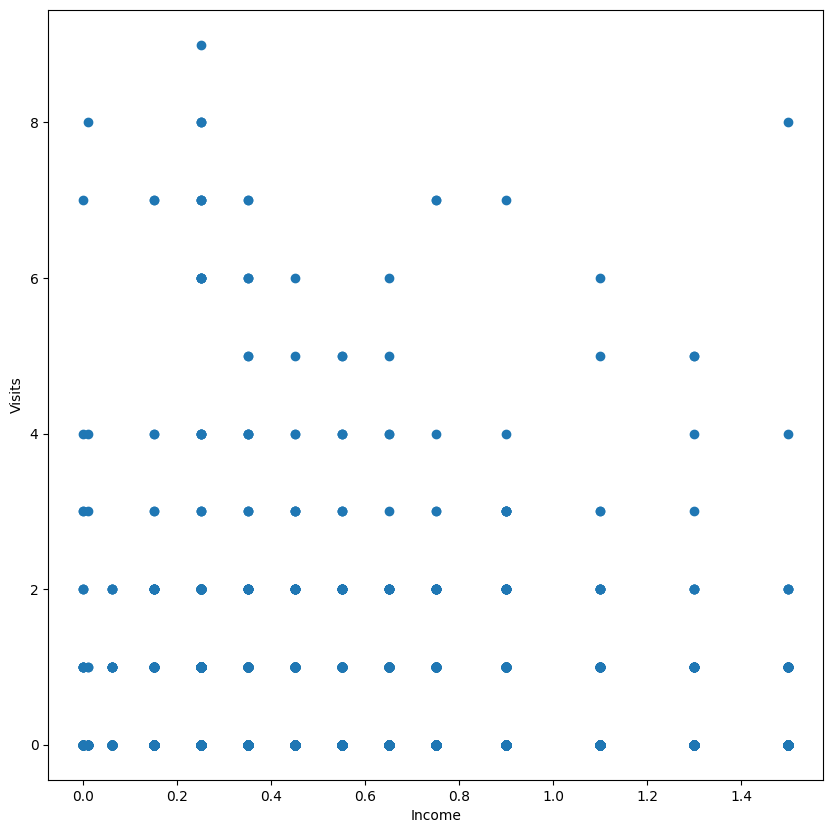

In [25]:
plt.figure(figsize=(10, 10))
plt.scatter(x='income', y='visits', data=df)
plt.xlabel('Income')
plt.ylabel('Visits')
plt.show()

COUNT AND VISUALIZATION OF NO. OF MALES AND FEMALES AFFECTED BY ILLNESS  

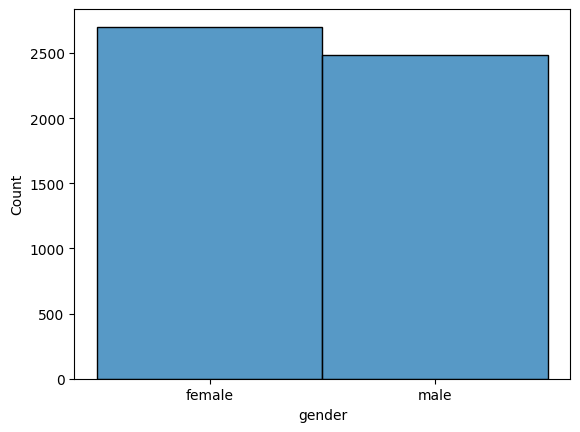

In [26]:
sns.histplot(df.gender, bins=2)
plt.show()

 PERCENTAGE OF PEOPLE WITH  HEALTH INSURANCE FOR LOW INCOME, OLDAGE AND PERCENTAGE OF PEOPLE WITH PRIVATE HEALTH INSURANCE

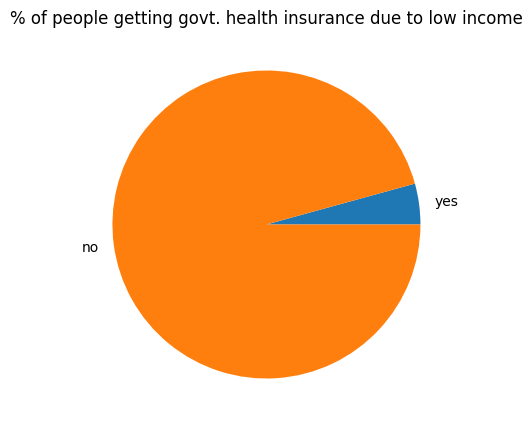

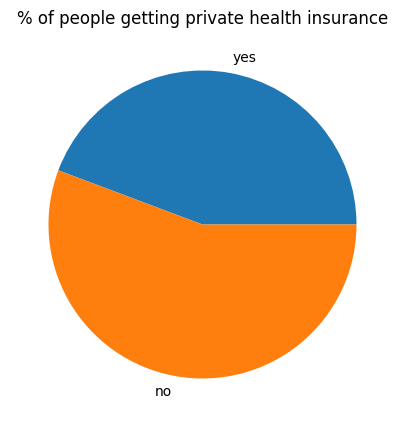

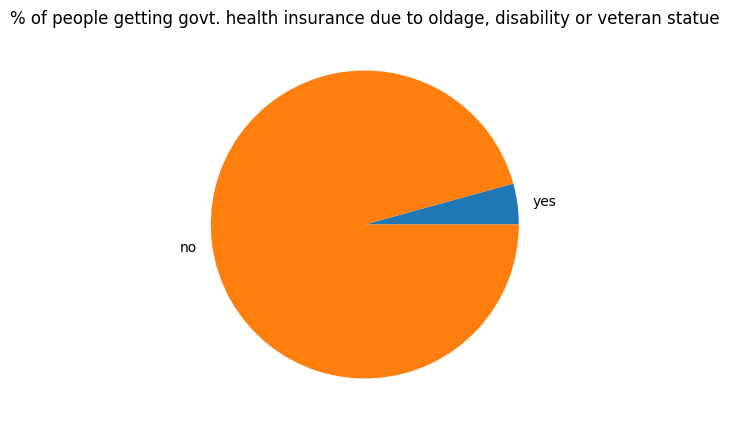

In [27]:
lable=['yes','no']
Y = df[df['freepoor']=='yes']
N = df[df['freepoor']=='no']
x = [Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x, labels=lable)
plt.title('% of people getting govt. health insurance due to low income')
plt.show()
lable=['yes','no']
Y = df[df['private']=='yes']
N = df[df['private']=='no']
x = [Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x, labels=lable)
plt.title('% of people getting private health insurance')
plt.show()
lable=['yes','no']
Y = df[df['freepoor']=='yes']
N = df[df['freepoor']=='no']
x = [Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x, labels=lable)
plt.title('% of people getting govt. health insurance due to oldage, disability or veteran statue')
plt.show()


PLOTTING A HORIZONTAL BARCHART TO ANALYSEE THE REDUCED DAYS DUE TO ILLNESS BASED ON GENDER

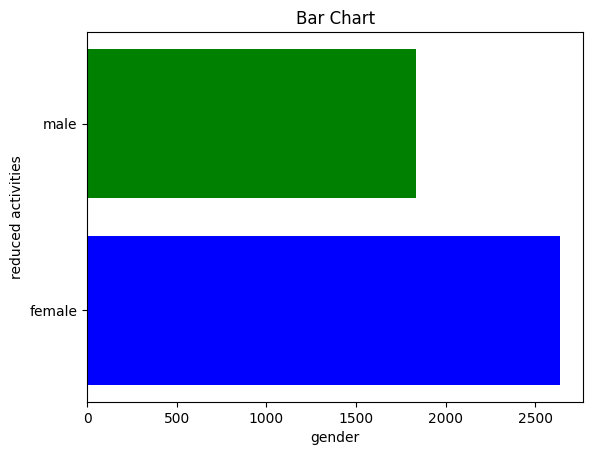

In [28]:
db=df.groupby('gender')['reduced'].sum().to_frame().reset_index()
plt.barh(db['gender'],db['reduced'],color=['blue','green'])
plt.title('Bar Chart')
plt.xlabel('gender')
plt.ylabel('reduced activities')
plt.show()